# The Discrete-Time Solow Growth Model
### A Simulation of Capital Accumulation, Steady State, and the Effects of a Savings Rate Shock

---

## Introduction

This notebook implements and simulates the discrete-time Solow growth model — one of the foundational frameworks in macroeconomics for understanding long-run economic growth. The Solow model explains how an economy accumulates capital over time, what determines its long-run steady state, and how shocks to key parameters — such as the savings rate — affect the path of capital, output, and consumption per worker.

The model is particularly relevant for understanding economic development in low- and middle-income countries, where questions of capital accumulation, savings behavior, and population growth are central to policy design. Drawing on my experience working in banking in Eswatini, I have a firsthand understanding of how these theoretical mechanisms operate in developing economy contexts.

**This notebook answers the following questions:**
- Derivation and parameterization of the model
- Calculation of the steady state capital stock
- Simulation of the economy's time path
- Analysis of a savings rate shock and its effects on capital and consumption
- Visualization of results using log-linearized plots

## 1. Model Setup

### 1.1 The Production Function

Consider a discrete-time Solow model with constant positive population growth and no technological change. Suppose that the aggregate production function is given by:

$$Y_t = A_0 K_t^\theta L_t^{1-\theta}$$

where $Y_t$ is aggregate output, $K_t$ is aggregate capital, $L_t$ is the labor force, $A_0$ is total factor productivity, and $\theta$ is the capital share parameter.

Dividing both sides by $L_t$, we obtain the production function in **per-worker terms**:

$$y_t = A_0 k_t^\theta$$

where $y_t = Y_t/L_t$ is output per worker and $k_t = K_t/L_t$ is capital per worker.

We work in per-worker terms because population is growing — aggregate capital could be rising while each worker actually has less capital available, which could be masking the true state of living standards. Per-worker quantities will allow us to track the welfare of the average person in the economy.

The parameter $\theta = 0.5$ implies **diminishing returns to capital** — doubling capital per worker increases output per worker, but by less than double. Each additional unit of capital contributes less and less to output. This is a fundamental property of the Solow model and the reason why capital accumulation alone cannot sustain long-run growth in output per worker.

### 1.2 The Law of Motion for Capital

The law of motion for capital per worker describes how the capital-labor ratio evolves over time:

$$k_{t+1} = \frac{(1-\delta)k_t + \sigma A_0 k_t^\theta}{1+n}$$

This equation tells us that next period's capital per worker is determined by three forces:
- **New investment from savings:** $\sigma A_0 k_t^\theta$ — households save a fraction $\sigma$ of output, which becomes new capital
- **Capital surviving depreciation:** $(1-\delta)k_t$ — a fraction $\delta$ of the existing capital stock wears out each period
- **Population growth dilution:** dividing by $(1+n)$ — as the labor force grows, the existing capital stock is spread across more workers, reducing capital per worker

### 1.3 The Steady State

At steady state, capital per worker is constant: $k_{t+1} = k_t = \bar{k}$. This occurs when new investment exactly offsets the combined effect of depreciation and population growth dilution. Setting $k_{t+1} = k_t$ in the law of motion and solving gives:

$$\bar{k} = \left(\frac{\sigma A_0}{n + \delta}\right)^{\frac{1}{1-\theta}}$$

The steady state is stable — regardless of where the economy starts, it will always converge to $\bar{k}$. This is one of the most important results of the Solow model.

## 2. Parameters and Calibration

We parameterize the model as follows:

| Parameter | Value | Interpretation |
|---|---|---|
| $A_0$ | 1 | Total factor productivity — baseline measure of the economy's overall efficiency |
| $H_0 = L_0$ | 5 | Initial labor force — the economy starts with 5 workers |
| $\theta$ | 0.5 | Capital share — capital and labor contribute equally to production |
| $\delta$ | 0.07 | Depreciation rate — 7% of the capital stock wears out each period |
| $\sigma$ | 0.5 | Savings rate — households save 50% of their income, consuming the remainder |
| $n$ | 0.05 | Population growth rate — the labor force grows by 5% per period |

The savings rate is particularly important as it is the key policy lever in the Solow model. A higher savings rate will result in more investment, thus  a higher steady state capital stock. This will in turn lead to a higher long-run output per worker, but also at the cost of lower current consumption.

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Model parameters
A0 = 1        # Total factor productivity
H0 = 5        # Initial labor force (L0)
theta = 0.5   # Capital share
delta = 0.07  # Depreciation rate
sigma = 0.5   # Initial savings rate
n = 0.05      # Population growth rate

Matplotlib is building the font cache; this may take a moment.


## 3. Steady State Capital Stock

We compute the steady state capital per worker $\bar{k}$ using the closed-form solution derived above. This represents the long-run equilibrium toward which the economy converges.

In [4]:
def steady_state_capital(sigma, A0, delta, n, theta):
    """Compute the steady state capital per worker."""
    return ((sigma * A0) / (n + delta))**(1 / (1 - theta))

k_steady_state = steady_state_capital(sigma, A0, delta, n, theta)
print(f"Steady-State Capital per Worker (k*): {k_steady_state:.2f}")

Steady-State Capital per Worker (k*): 17.36


The steady state capital per worker is $\bar{k} \approx 17.36$. This means that in the long run, with a savings rate of 50%, the economy sustains approximately 17.36 units of capital per worker. At this point, new investment exactly offsets depreciation and the dilution effect of population growth.

## 4. Calculating Initial Aggregate Values

We compute the initial aggregate capital stock $K_0$, aggregate output $Y_0$, and consumption per worker $c_0$. Since we begin at steady state, $k_0 = \bar{k}$, and aggregate capital is:

$$K_0 = k_0 \times L_0$$

Aggregate output follows from the production function, and consumption per worker is the share of per-worker output not saved.

In [5]:
def calculate_K0_Y0_c0(k0, H0, A0, theta, sigma):
    """Compute initial aggregate capital, output, and consumption per worker."""
    K0 = k0 * H0                              # Aggregate capital
    Y0 = A0 * (K0**theta) * (H0**(1-theta))  # Aggregate output
    y0 = Y0 / H0                              # Output per worker
    c0 = (1 - sigma) * y0                     # Consumption per worker
    return K0, Y0, c0

k0 = k_steady_state  # Economy starts at steady state
K0, Y0, c0 = calculate_K0_Y0_c0(k0, H0, A0, theta, sigma)

print(f"Initial Capital per Worker (k0):        {k0:.2f}")
print(f"Initial Aggregate Capital Stock (K0):   {K0:.2f}")
print(f"Initial Aggregate Output (Y0):          {Y0:.2f}")
print(f"Initial Consumption per Worker (c0):    {c0:.2f}")

Initial Capital per Worker (k0):        17.36
Initial Aggregate Capital Stock (K0):   86.81
Initial Aggregate Output (Y0):          20.83
Initial Consumption per Worker (c0):    2.08


## 5. The Savings Rate Shock

We now introduce a policy shock: at period 3, the savings rate is suddenly reduced from $\sigma = 0.5$ to $\sigma = 0.1$. This is the central experiment of the simulation.

To verify the law of motion, we first compute $k_1$, $k_2$, $k_3$ (before the shock) and $k_4$ (after the shock).

In [6]:
sigma_initial = 0.5  # Savings rate before the shock
sigma_new = 0.1      # Savings rate after the shock (period 3 onward)

def next_k(k_t, sigma, A0, theta, delta, n):
    """Compute next period capital per worker using the law of motion."""
    return ((1 - delta) * k_t + sigma * A0 * k_t**theta) / (1 + n)

# Compute k1, k2, k3 under the initial savings rate
k = [k0]
for _ in range(3):
    k.append(next_k(k[-1], sigma_initial, A0, theta, delta, n))

# k4 is computed under the new savings rate
k.append(next_k(k[-1], sigma_new, A0, theta, delta, n))

k1, k2, k3, k4 = k[1], k[2], k[3], k[4]
print(f"k1 = {k1:.4f}")
print(f"k2 = {k2:.4f}")
print(f"k3 = {k3:.4f}")
print(f"k4 = {k4:.4f}")

k1 = 17.3611
k2 = 17.3611
k3 = 17.3611
k4 = 15.7738


As expected, $k_1 = k_2 = k_3 \approx 17.36$ — the economy remains at the old steady state in periods 0 through 3, confirming that the steady state is stable. At period 4, following the savings rate reduction, capital per worker falls to approximately 15.77, beginning the transition to the new lower steady state.

## 6. Full Simulation: T = 30 Periods

We simulate the full time path of capital, output, and consumption per worker over 30 periods, incorporating the savings rate shock at period 3.

In [7]:
T = 30
k_t = np.zeros(T+1)
y_t = np.zeros(T+1)
c_t = np.zeros(T+1)
ln_K_t = np.zeros(T+1)
ln_C_t = np.zeros(T+1)

k_t[0] = k0  # Start at old steady state

for t in range(T):
    # Apply savings rate shock from period 3 onward
    sigma_t = sigma_new if t >= 3 else sigma_initial

    y_t[t] = A0 * k_t[t]**theta
    c_t[t] = (1 - sigma_t) * y_t[t]
    k_t[t+1] = ((1 - delta) * k_t[t] + sigma_t * A0 * k_t[t]**theta) / (1 + n)
    ln_K_t[t] = np.log(k_t[t])
    ln_C_t[t] = np.log(c_t[t])

# Compute final period values
y_t[T] = A0 * k_t[T]**theta
c_t[T] = (1 - sigma_new) * y_t[T]
ln_K_t[T] = np.log(k_t[T])
ln_C_t[T] = np.log(c_t[T])

## 7. Results: Time Paths of Capital, Output, and Consumption

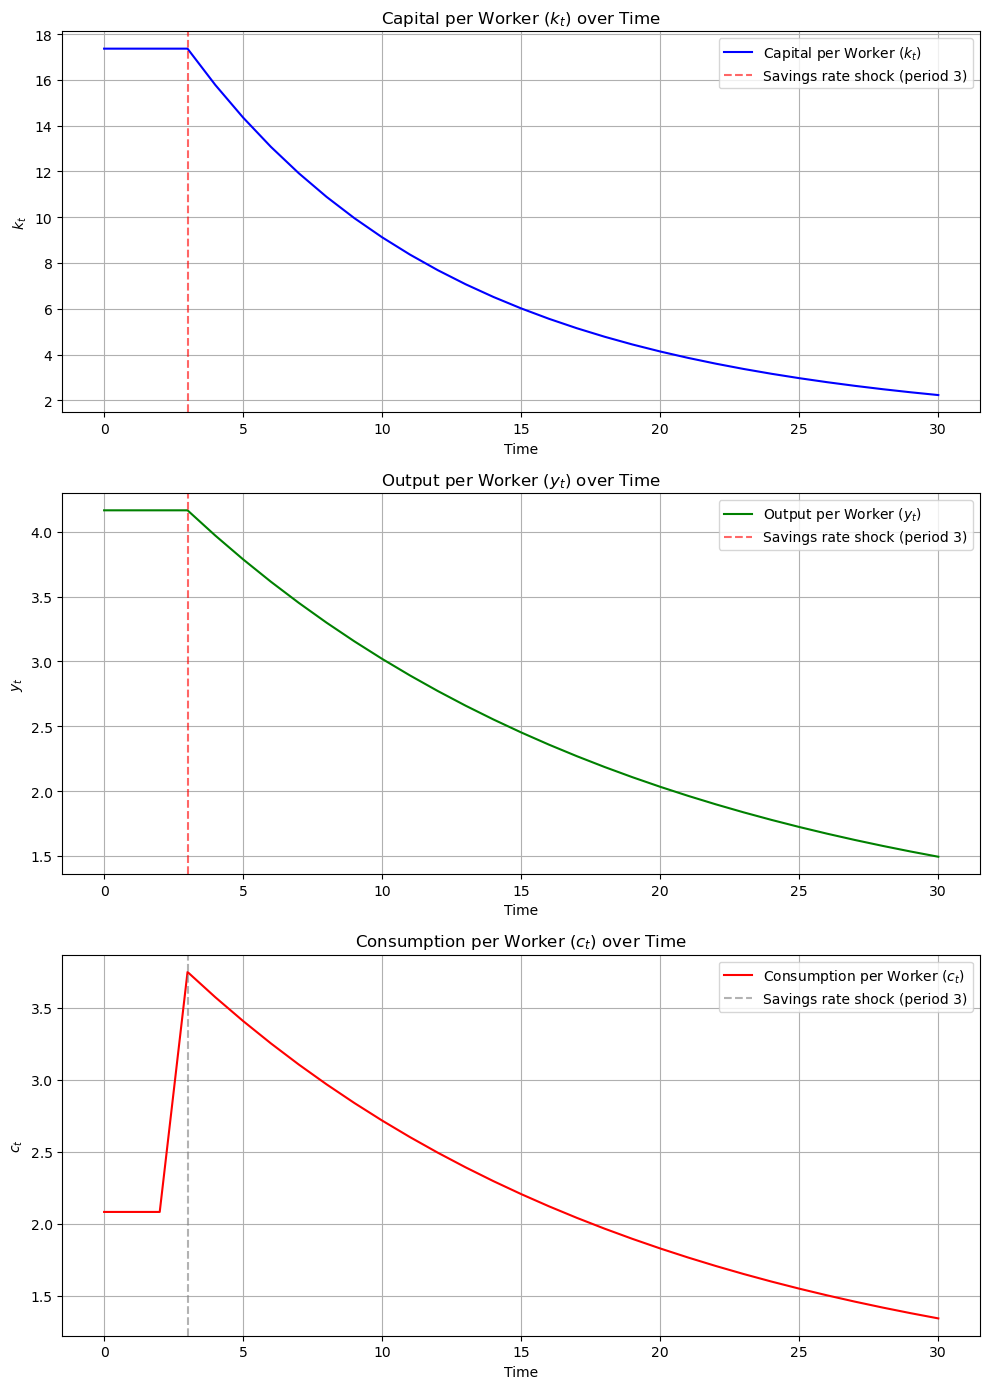

In [8]:
fig, ax = plt.subplots(3, 1, figsize=(10, 14))

ax[0].plot(range(T+1), k_t, label='Capital per Worker ($k_t$)', color='blue')
ax[0].axvline(x=3, color='red', linestyle='--', alpha=0.6, label='Savings rate shock (period 3)')
ax[0].set_title('Capital per Worker ($k_t$) over Time')
ax[0].set_xlabel('Time')
ax[0].set_ylabel('$k_t$')
ax[0].legend()
ax[0].grid(True)

ax[1].plot(range(T+1), y_t, label='Output per Worker ($y_t$)', color='green')
ax[1].axvline(x=3, color='red', linestyle='--', alpha=0.6, label='Savings rate shock (period 3)')
ax[1].set_title('Output per Worker ($y_t$) over Time')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('$y_t$')
ax[1].legend()
ax[1].grid(True)

ax[2].plot(range(T+1), c_t, label='Consumption per Worker ($c_t$)', color='red')
ax[2].axvline(x=3, color='gray', linestyle='--', alpha=0.6, label='Savings rate shock (period 3)')
ax[2].set_title('Consumption per Worker ($c_t$) over Time')
ax[2].set_xlabel('Time')
ax[2].set_ylabel('$c_t$')
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()

## 8. Log-Linearized Plots

We plot $\ln(K_t)$ and $\ln(C_t)$ to better visualize the transition dynamics. Log-linearization is standard in macroeconomics as it transforms multiplicative relationships into additive ones, making convergence paths easier to interpret.

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/var/folders/fp/tr7l0rpd225b23t0g0szp1j80000gn/T/ipykernel_9960/3240672818.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(range(T+1), ln_K_t, label='$\ln(K_t)$', color='blue')
/var/folders/fp/tr7l0rpd225b23t0g0szp1j80000gn/T/ipykernel_9960/3240672818.py:5: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Log of Capital per Worker ($\ln(K_t)$) over Time')
/var/folders/fp/tr7l0rpd225b23t0g0szp1j80000gn/T/ipykernel_9960/3240672818.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\ln(K_t)$')


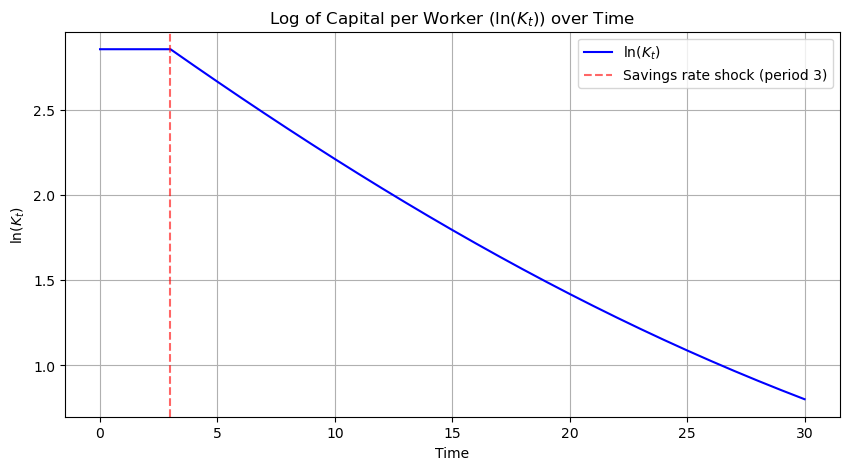

In [9]:
# Plot ln(K_t)
plt.figure(figsize=(10, 5))
plt.plot(range(T+1), ln_K_t, label='$\ln(K_t)$', color='blue')
plt.axvline(x=3, color='red', linestyle='--', alpha=0.6, label='Savings rate shock (period 3)')
plt.title('Log of Capital per Worker ($\ln(K_t)$) over Time')
plt.xlabel('Time')
plt.ylabel('$\ln(K_t)$')
plt.legend()
plt.grid(True)
plt.show()

**Interpreting $\ln(K_t)$:**

The log capital path tells a clear story of transition dynamics:

- **Periods 0–2 (flat):** The economy begins at the old steady state ($\bar{k} \approx 17.36$). New investment exactly offsets depreciation and population growth dilution, so capital per worker remains constant. The bathtub is perfectly balanced — water flowing in equals water flowing out.

- **Period 3 onward (declining):** The savings rate drops from $\sigma = 0.5$ to $\sigma = 0.1$, reducing new investment. The balance is broken — depreciation and population growth now exceed investment, so capital per worker begins to fall. The curve is concave, reflecting diminishing returns: the gap between investment and depreciation narrows as capital falls, so the rate of decline slows over time.

- **Convergence:** The curve eventually flattens as the economy approaches a new, lower steady state consistent with $\sigma = 0.1$. At the new steady state, investment once again exactly offsets depreciation and population growth — but at a lower level of capital per worker.

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/var/folders/fp/tr7l0rpd225b23t0g0szp1j80000gn/T/ipykernel_9960/2311792154.py:3: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(range(T+1), ln_C_t, label='$\ln(C_t)$', color='orange')
/var/folders/fp/tr7l0rpd225b23t0g0szp1j80000gn/T/ipykernel_9960/2311792154.py:5: SyntaxWarning: invalid escape sequence '\l'
  plt.title('Log of Consumption per Worker ($\ln(C_t)$) over Time')
/var/folders/fp/tr7l0rpd225b23t0g0szp1j80000gn/T/ipykernel_9960/2311792154.py:7: SyntaxWarning: invalid escape sequence '\l'
  plt.ylabel('$\ln(C_t)$')


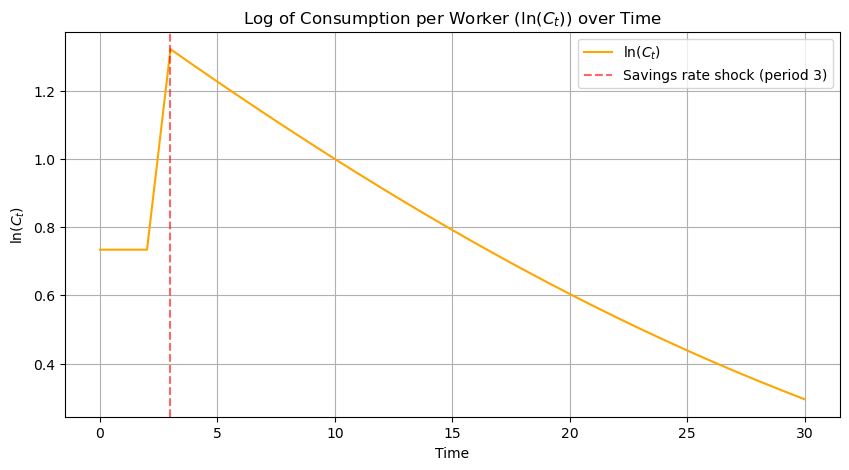

In [10]:
# Plot ln(C_t)
plt.figure(figsize=(10, 5))
plt.plot(range(T+1), ln_C_t, label='$\ln(C_t)$', color='orange')
plt.axvline(x=3, color='red', linestyle='--', alpha=0.6, label='Savings rate shock (period 3)')
plt.title('Log of Consumption per Worker ($\ln(C_t)$) over Time')
plt.xlabel('Time')
plt.ylabel('$\ln(C_t)$')
plt.legend()
plt.grid(True)
plt.show()

**Interpreting $\ln(C_t)$:**

The consumption path reveals one of the most important trade-offs in macroeconomics:

- **Periods 0–2 (flat):** Consumption is constant at the old steady state level. With $\sigma = 0.5$, households consume 50% of output each period.

- **Period 3 (sharp jump upward):** When the savings rate drops to $\sigma = 0.1$, households immediately redirect the additional 40% of income from saving to consumption. Since output has not yet changed — capital is still at the old steady state level — consumption per worker jumps sharply upward. This is the short-run consumption boom.

- **Period 3 onward (smooth decline):** The consumption boom is short-lived. With less being saved and invested, capital per worker begins to erode. As capital falls, output falls with it, and since consumption is a fixed share of output, consumption per worker declines smoothly toward a new, lower steady state.

**The core policy insight:** This graph illustrates the fundamental savings-consumption trade-off at the heart of the Solow model. Households enjoy an immediate consumption boost by saving less, but sacrifice long-run living standards as the capital stock depletes. Conversely, higher savings today — though costly in the short run — leads to a higher capital stock, higher output, and higher consumption in the long run. This insight has direct implications for development policy in economies like Eswatini, where encouraging household and national savings is a key channel for long-run growth.

## 9. Summary and Key Takeaways

This simulation of the discrete-time Solow model illustrates several fundamental results in growth theory:

1. **Steady State Existence and Stability:** Every economy has a unique steady state capital stock determined by its savings rate, depreciation rate, and population growth rate. Regardless of the starting point, the economy always converges to this steady state.

2. **Diminishing Returns to Capital:** Because $\theta < 1$, each additional unit of capital contributes less to output than the previous one. This is why capital accumulation alone cannot sustain long-run growth in output per worker.

3. **The Savings-Consumption Trade-off:** A reduction in the savings rate generates a short-run consumption boom but leads to a permanently lower steady state capital stock and lower long-run living standards. This trade-off is central to debates about optimal savings policy in developing economies.

4. **Transition Dynamics:** The path to steady state is characterized by diminishing speed of convergence — the economy adjusts fastest when it is furthest from steady state, and slows as it approaches equilibrium.

---
*Notebook by Sinenhlanhla | MS Economics, Northeastern University*  
*Macroeconomics Theory — Solow Model Simulation*